In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fake reviews dataset.csv')

# Display the first few rows of the dataset
df.head()


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [2]:
# Check the structure of the dataset
df.info()

# Check for any missing values
df.isnull().sum()

# Check the distribution of the labels
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


label
CG    20216
OR    20216
Name: count, dtype: int64

In [3]:
# Map the labels to binary values: 1 for fake (CG) and 0 for genuine (OR)
df['label'] = df['label'].map({'CG': 1, 'OR': 0})

# Verify the mapping
df['label'].value_counts()


label
1    20216
0    20216
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the feature (X) and target (y) variables
X = df['text_']  # The review text
y = df['label']  # The labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Convert the text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the transformed data
X_train_tfidf.shape, X_test_tfidf.shape

((40027, 5000), (405, 5000))

In [5]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Function to predict whether a review is fake or genuine
def predict_review(review_text):
    # Transform the review text using the TF-IDF vectorizer
    review_tfidf = vectorizer.transform([review_text])
    
    # Predict the label using the trained model
    prediction = model.predict(review_tfidf)
    
    # Map the prediction back to the original labels
    label = 'CG' if prediction[0] == 1 else 'OR'
    
    return label

# Get user input
user_review = input("Enter the review text: ")

# Predict and display the result
result = predict_review(user_review)
print(f'The review is classified as: {result}')

Enter the review text: good
The review is classified as: CG


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 88.40%


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       210
           1       0.87      0.89      0.88       195

    accuracy                           0.88       405
   macro avg       0.88      0.88      0.88       405
weighted avg       0.88      0.88      0.88       405


Confusion Matrix:
[[185  25]
 [ 22 173]]


In [8]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 108.9 kB/s eta 0:19:07
   ---------------------------------------- 0.0/124.9 MB 115.5 kB/s eta 0:18:02
   ---------------------------------------- 0.1/124.9 MB 163.6 kB/s eta 0:12:44
   ---------------------------------------- 0.1/124.9 MB 183.3 kB/s eta 0:11:21
   ---------------------------------------- 0.1/124.9 MB 303.9 kB/s eta 0:06:51
   -------------------------------------

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [27]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_tfidf)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")


Logistic Regression Accuracy: 92.10%


In [28]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")


XGBoost Accuracy: 88.89%


In [29]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 89.38%


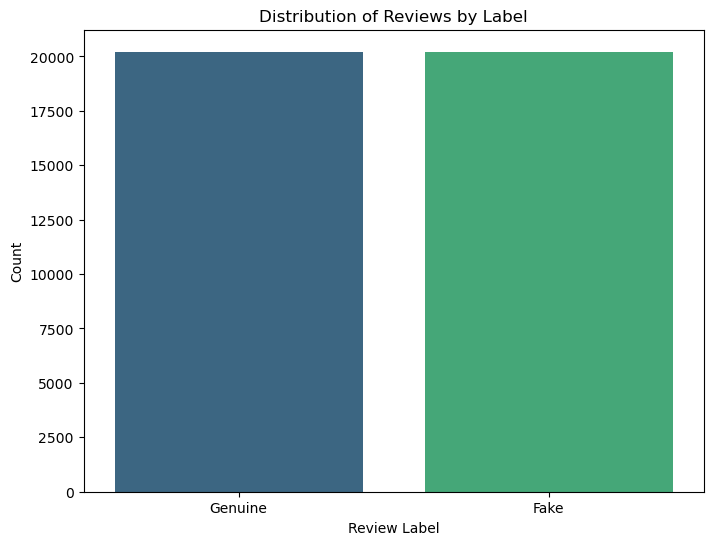

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.xlabel('Review Label')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Label')
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fake'])
plt.show()


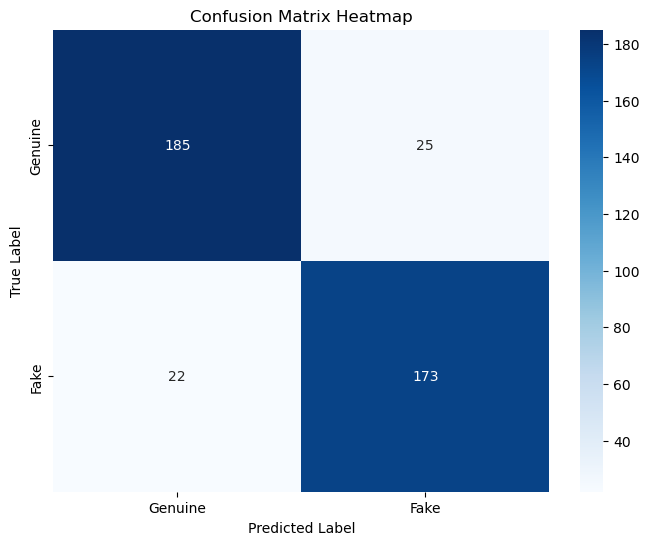

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [32]:
# Store all accuracies in a dictionary
accuracies = {
    "Logistic Regression": log_reg_accuracy,
   # "Naive Bayes": model_accuracy,
    "Random Forest": rf_accuracy,
    "XGBoost": xgb_accuracy
}

# Find the algorithm with the highest accuracy
best_algorithm = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_algorithm]

print(f"The best algorithm is {best_algorithm} with an accuracy of {best_accuracy * 100:.2f}%")


The best algorithm is Logistic Regression with an accuracy of 92.10%
